# Tarea  3  Algoritmos de Aprendizaje Supervisado 
---
## Estudiante: Gabriel Orlando Cuentas Torres
---
Dataset Regresión Logística – Heart Disease Cleveland UCI
---
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.  
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entrenar el "3" modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo. 
5. Entrenar el modelo configurando los diferentes hiperparámetros. 
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc. 
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo. 
8. Interpretar, analizar y documentar los resultados obtenidos.

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [57]:
# Cargar las librerías necesarias

import pandas as pd # Manejo y análisis de la estructura de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns  # Creación gráficos estadísticos
import matplotlib.pyplot as plt  # Creación de gráficos en dos dimensiones

# Librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.Linear_model import LinearRegression -> Libreria para Regresión Logistica
from sklearn.metrics import classification_report, confusion_matrix

In [58]:
# lectura de datos en Python y lo cargamos en la variable Datos
Datos = pd.read_csv('./heart_cleveland_upload.csv')

In [59]:
# Realizamos lectura de los datos para el analisis exploratorio
Datos.head(50)

,Edad,Sexo,cp,Presion arterial,Colesterol,fbs,restecg,Frecuencia cardiaca,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [60]:
#Descripción de los datos
Datos.describe()

,Edad,Sexo,cp,Presion arterial,Colesterol,fbs,restecg,Frecuencia cardiaca,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

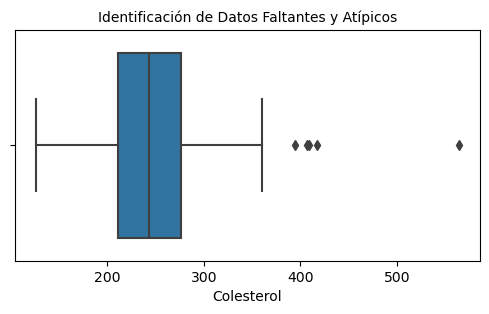

In [62]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Colesterol'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [63]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en Nivel de Colesterol: ",Datos['Colesterol'].isin([0]).sum())
print("Cantidad de Registros con cero en Frecuencia cardiaca: ",Datos['Frecuencia cardiaca'].isin([0]).sum())
print("Cantidad de Registros con cero en Dolor Anginoso: ",Datos['exang'].isin([0]).sum())
print("Cantidad de Registros con cero en Nivel Deprecion Max: ",Datos['oldpeak'].isin([0]).sum())
print("Cantidad de Registros con cero en Presencia o ausencia de enfermedad cArd: ",Datos['condition'].isin([0]).sum())

Cantidad de Registros con cero en Nivel de Colesterol:  0
Cantidad de Registros con cero en Frecuencia cardiaca:  0
Cantidad de Registros con cero en Dolor Anginoso:  200
Cantidad de Registros con cero en Nivel Deprecion Max:  96
Cantidad de Registros con cero en Presencia o ausencia de enfermedad cArd:  160


In [64]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

Datos['Colesterol']=Datos['Colesterol'].replace(0,Datos['Colesterol'].mean())
Datos['Frecuencia cardiaca']=Datos['Frecuencia cardiaca'].replace(0,Datos['Frecuencia cardiaca'].mean())
Datos['exang']=Datos['exang'].replace(0,Datos['exang'].mean())
Datos['oldpeak']=Datos['oldpeak'].replace(0,Datos['oldpeak'].mean())
Datos['condition']=Datos['condition'].replace(0,Datos['condition'].mean())

In [65]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en Nivel de Colesterol: ",Datos['Colesterol'].isin([0]).sum())
print("Cantidad de Registros con cero en Frecuencia cardiaca: ",Datos['Frecuencia cardiaca'].isin([0]).sum())
print("Cantidad de Registros con cero en Dolor Anginoso: ",Datos['exang'].isin([0]).sum())
print("Cantidad de Registros con cero en Nivel Deprecion Max: ",Datos['oldpeak'].isin([0]).sum())
print("Cantidad de Registros con cero en Presencia o ausencia de enfermedad cArd: ",Datos['condition'].isin([0]).sum())

Cantidad de Registros con cero en Nivel de Colesterol:  0
Cantidad de Registros con cero en Frecuencia cardiaca:  0
Cantidad de Registros con cero en Dolor Anginoso:  0
Cantidad de Registros con cero en Nivel Deprecion Max:  0
Cantidad de Registros con cero en Presencia o ausencia de enfermedad cArd:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

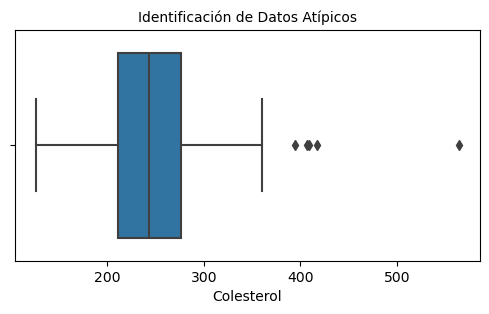

In [66]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Colesterol'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [68]:
#Conteo de Datos Atípicos

nivel_minimo=20
nivel_maximo=800
Total_Atipicos=((Datos['Colesterol']<nivel_minimo)|(Datos['Colesterol']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [70]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['Colesterol']<nivel_maximo)&(Datos['Colesterol']>nivel_minimo)]

In [71]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((Datos['Colesterol']<nivel_minimo)|(Datos['Colesterol']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [37]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Edad                 0 non-null      int64  
 1   Sexo                 0 non-null      int64  
 2   cp                   0 non-null      int64  
 3   Presion arterial     0 non-null      int64  
 4   Colesterol           0 non-null      int64  
 5   fbs                  0 non-null      int64  
 6   restecg              0 non-null      int64  
 7   Frecuencia cardiaca  0 non-null      int64  
 8   exang                0 non-null      float64
 9   oldpeak              0 non-null      float64
 10  slope                0 non-null      int64  
 11  ca                   0 non-null      int64  
 12  thal                 0 non-null      int64  
 13  condition            0 non-null      float64
dtypes: float64(3), int64(11)
memory usage: 0.0 bytes


## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Característica de interes:

    glucemia en ayunas (> 120 mg/dL, 1 = true; <= 120 mg/dL, 0 = false)
    Predecir si una persona puede tener diabetes

In [53]:
# Total de personas con Diabetes

Datos['fbs'].value_counts()

Series([], Name: count, dtype: int64)

In [54]:
Datos[['fbs']].head(40)

,fbs


## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [55]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('fbs',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = Datos['fbs'] # Se cargan los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

ValueError: With n_samples=0, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [72]:
print (X_train)

NameError: name 'X_train' is not defined

In [73]:
print (Y_train)

NameError: name 'Y_train' is not defined

## 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [74]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

NameError: name 'X_train' is not defined

In [75]:
print (Y_test)

NameError: name 'Y_test' is not defined

In [76]:
print (Prediccion)

NameError: name 'Prediccion' is not defined

## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [77]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

NameError: name 'Y_test' is not defined

## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

In [78]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

NameError: name 'Y_test' is not defined

In [79]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

NameError: name 'Y_test' is not defined

## 8. Interpretar, analizar y documentar los resultados obtenidos

Del desempeño del modelo se puede describir:

    Precisión: Precisión mide la proporción de predicciones positivas verdaderas entre todas las predicciones positivas realizadas por el modelo. Aquí la precisión para la clase "diabético" es 0,70, lo que significa que el 70% de los predichos como diabéticos por el modelo eran en realidad diabéticos.

    Recall: Mide la proporción de predicciones positivas verdaderas entre todas las instancias positivas reales en el conjunto de datos. Aquí el Recall para la clase "diabético" es 0,57, lo que indica que el modelo identificó correctamente al 57% de todos los diabéticos.

    F1 Score: Es la media armónica de precisión y recuperación. Proporciona una puntuación única que equilibra la Precisión y Recall. Aquí la puntuación F1 para la clase "diabética" es 0,61, lo que indica un equilibrio entre precisión y recuerdo.

De la Matriz de Confusión podemos interpretar:

    Verdaderos negativos: el recuento de observaciones que un clasificador predijo correctamente como falso 109

    Verdaderos positivos: el recuento de observaciones que un clasificador predijo correctamente como Verdadero 36

    Falsos positivos: el recuento de observaciones que un clasificador predijo incorrectamente como Verdaderas 15

    Falsos negativos: el recuento de observaciones que un clasificador predijo incorrectamente como falso 31

De la curva de precisión del modelo se puede interpretar:

    El AUC es 0,69 lo que significa que el 69 % de las predicciones del clasificador son correctas en todos los umbrales de clasificación.
